# PyLAR
## [Python utilities for the LAR model](https://github.com/seap-udea/pylar)

## Basin analysis
<a target="_blank" href="https://colab.research.google.com/github/seap-udea/pylar/blob/main/tutorials/pylar-basin_analysis.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

### Before start

If you are using `Google Colab` you must execute this cell first:

In [14]:
import sys
if 'google.colab' in sys.modules:
    !sudo pip install -Uq ipylar

Import `PyLAR`

In [15]:
import ipylar as lar
%load_ext autoreload 
%autoreload 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


> **NOTE**: The *magic commands* `%load_ext` y `%autoreload` are only necessary during the development of this notebook. You may remove it when developing your own notebooks.

### Creating a basin and loading LAR timeseries

Create the basin and load the LAR timeseries:


Amazonas (key: amazonas)
Number of data points: merge = 493, total = 493
Initial time: 285310800.0
Initial date: 1979-01-16 00:00:00
Total data points: 493
Time span: 40.99931553730322 a = 14975.0 d
Signal correlation (R - nq): -0.058486683234719256


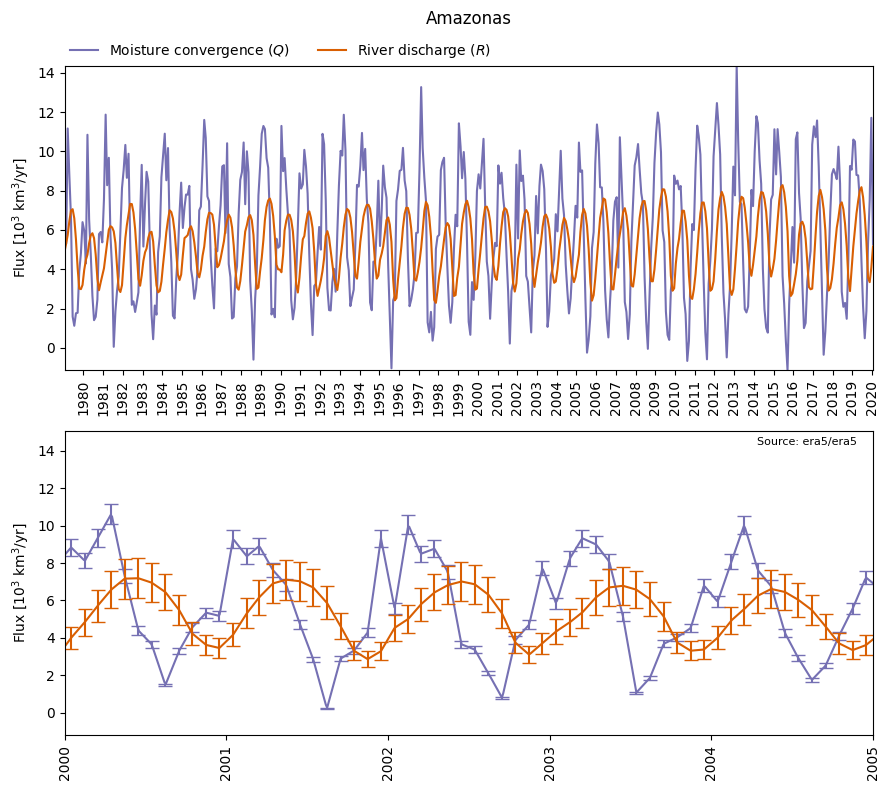

In [16]:
amazonas = lar.Basin(key='amazonas',name='Amazonas')
amazonas.read_basin_data()
fig = amazonas.plot_basin_series()

If you have an independent source of data, you must be sure that the data is properly loaded into the basin dataframe:

In [17]:
amazonas.data.head(3)

,datestd,datetime,time,R,dR,nq,dnq,Rref,nqref
datestd,,,,,,,,,
1979-01-16,1979-01-16,1979-01-16,285310800.0,154457.742,23168.66130,164467.638205,8223.381910,154457.742,164467.638205
1979-02-16,1979-02-16,1979-02-16,287989200.0,168767.933,25315.18995,167913.979457,8395.698973,168767.933,167913.979457
1979-03-16,1979-03-16,1979-03-16,290408400.0,181792.971,27268.94565,353951.371242,17697.568562,181792.971,353951.371242


### Generating a random realization

Since all fluxes in the basin data (discharge, R and moisture convergenge, Q) have errors, the timeseries can be very different. You may create random realizations of the timeseries: 

To magnify the effect, let's increase artificially the errors:

In [18]:
amazonas.set_vanilla_errors(vQ=0.05,vR=0.1)

Now generate a random basin timeseries:

In [19]:
random_amazonas = amazonas.shuffle_basin()

Let's plot it the timeseries including the original timeseries:

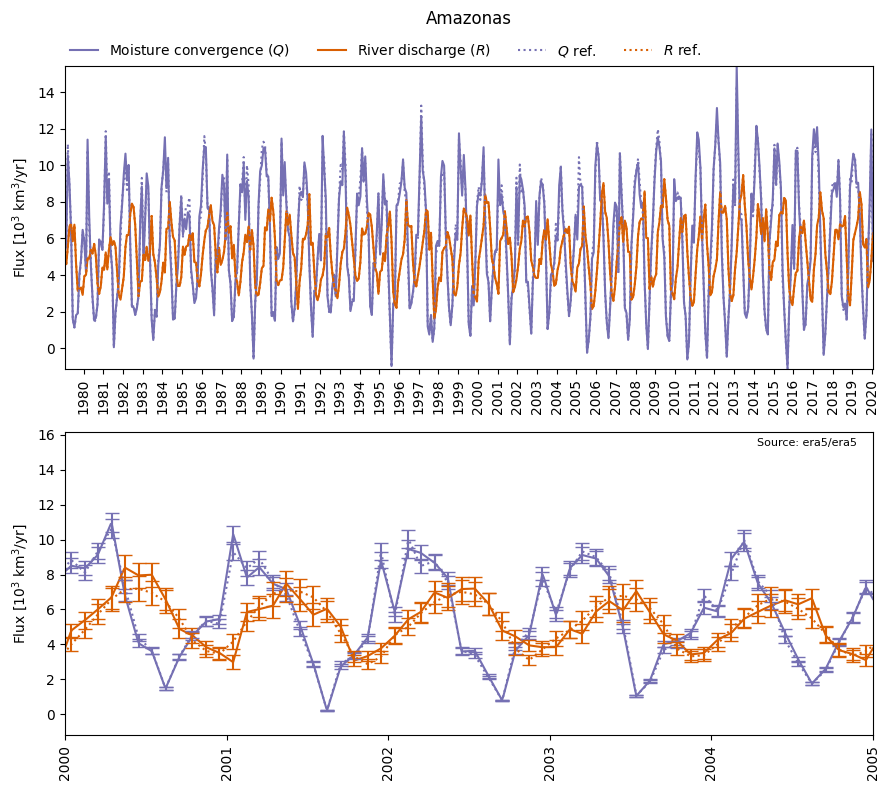

In [20]:
fig=random_amazonas.plot_basin_series(show_ref=True)

### Accumulation and release

According to the LAR model, all basins have periods of accumulation, when the moisture convergence is larger than the discharge, and release otherwise. You can detect the time and intensity of these periods using:

In [21]:
amazonas.detect_accumulation_release()

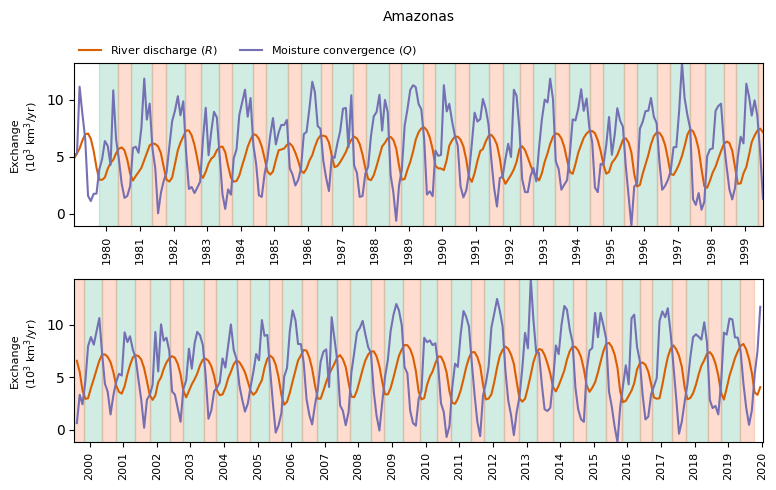

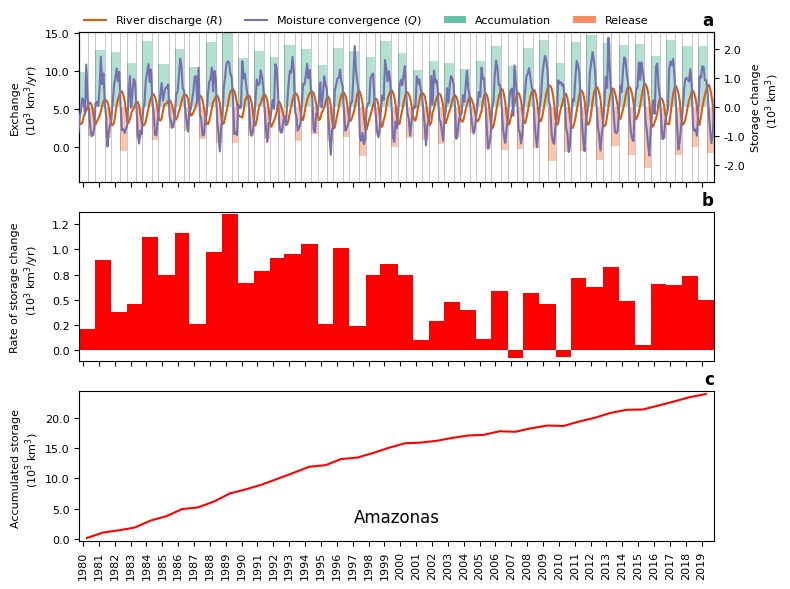

In [22]:
fig_acrel,fig_stor = amazonas.plot_accumulation_release()

### Annual cycle

You can fold any of the LAR signals:

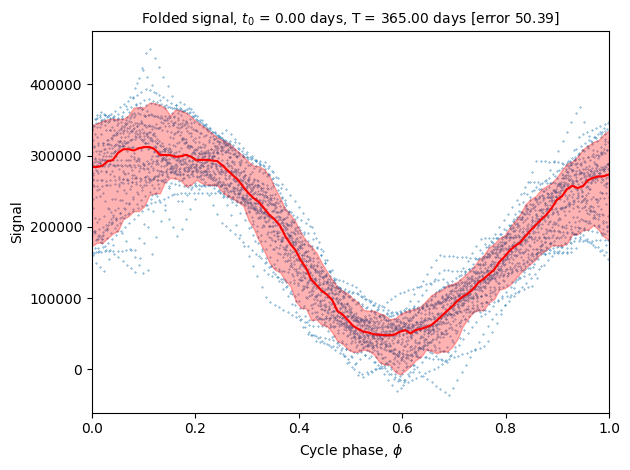

In [23]:
error = lar.Util.folding_signal([0,365],fint=amazonas.nqint,plot=True)

You can also calculate the optimal folding:

100%|██████████| 5/5 [00:01<00:00,  3.10it/s]


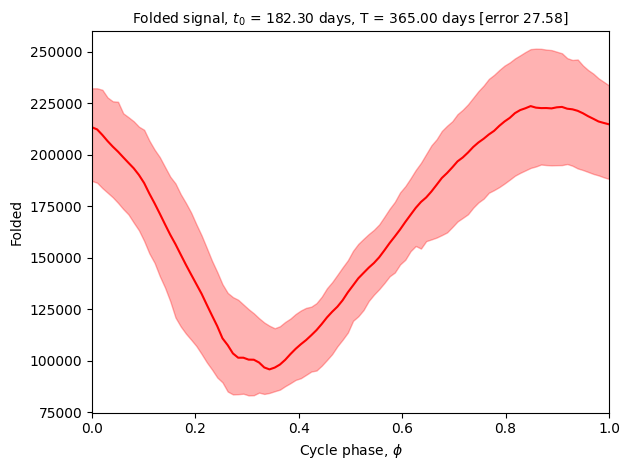

In [24]:
pars,phsams,fsam,error = lar.Util.folding_optimal(
    fint=amazonas.Rint,pdays=5,plot=True
)

100%|██████████| 5/5 [00:01<00:00,  3.47it/s]


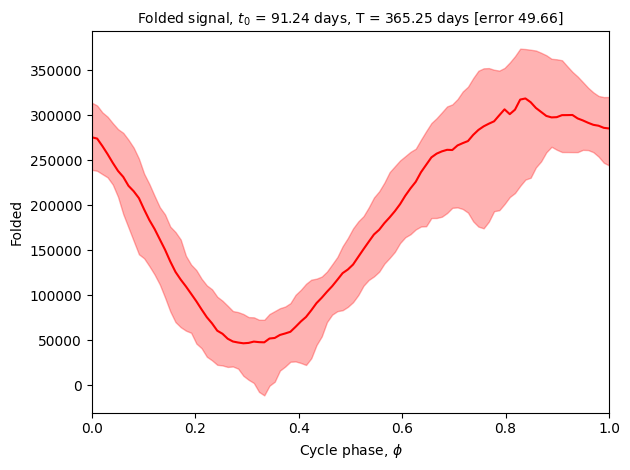

In [25]:
pars,phsams,fsam,error = lar.Util.folding_optimal(
    fint=amazonas.nqint,pdays=5,plot=True
)

We can also analyse the two cycles to see if they close:

100%|██████████| 30/30 [00:09<00:00,  3.13it/s]


Average discharge (<R>): 5.28
Average moisture convergence (<Q>): 5.89
R optimal folding: t = 164.59 days, P = 365.003 days, error = 27.57
Q optimal folding: t = 100.69 days, P = 365.250 days, error = 49.61


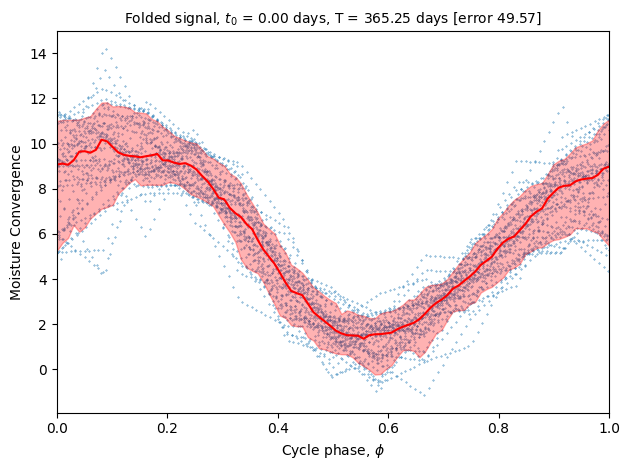

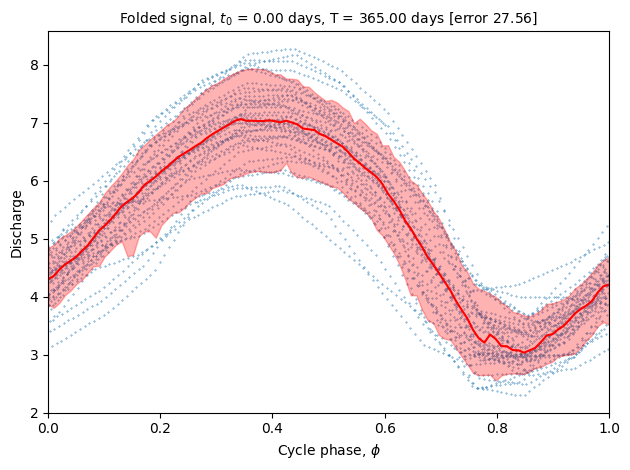

In [26]:
amazonas.get_annual_cycle(pdays=30)

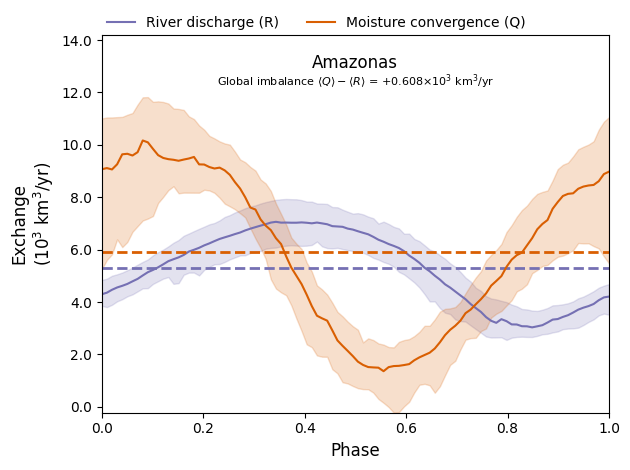

In [27]:
amazonas.plot_annual_cycle()

<hr/>

For more examples and tutorials of `PyLAR` see the [GitHub repository](https://github.com/seap-udea/pylar/tree/main/tutorials)